## Analysis of the Human Freedom Index

The Human Freedom Index provides a way to understand the relative freedom of countries across the world.

add link, source, objective

In [10]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 1.6 MB/s eta 0:00:00
  Using cached matplotlib-3.5.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached Pillow-9.2.0-cp310-cp310-win_amd64.whl (3.3 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# loading the dataset
raw_data = pd.read_csv("hfi_cc_2020.csv")
raw_data.head()

,Unnamed: 0,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,...,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
1,1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,6.3,4.4,...,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36.0,9.26
2,2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36.0,7.50
3,3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.7,7.70,34.0,7.50
4,4,2014,ALB,Albania,Eastern Europe,7.65,48.0,2.0,6.1,4.8,...,6.0,9.7,6.0,7.2,6.0,6.8,7.8,7.65,37.0,7.50


In [7]:
# cleaning
# drop rows where hf_score (human freedom score) is empty/NaN
data = raw_data.dropna(subset=['hf_score'])
data.head()

,Unnamed: 0,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,...,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
1,1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,6.3,4.4,...,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36.0,9.26
2,2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36.0,7.50
3,3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,6.7,4.5,...,6.0,9.7,6.0,7.3,7.1,7.0,7.7,7.70,34.0,7.50
4,4,2014,ALB,Albania,Eastern Europe,7.65,48.0,2.0,6.1,4.8,...,6.0,9.7,6.0,7.2,6.0,6.8,7.8,7.65,37.0,7.50


In [8]:
# looking at 2018 data
data_2018 = data.loc[data['year'] == 2018]
data_2018.head()

,Unnamed: 0,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,...,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
11,11,2018,DZA,Algeria,Middle East & North Africa,5.20,154.0,4.0,5.2,5.6,...,2.4,9.3,3.9,8.8,7.0,5.9,5.6,4.97,157.0,3.50
22,22,2018,AGO,Angola,Sub-Saharan Africa,5.48,144.0,4.0,2.7,4.4,...,2.4,8.7,5.0,7.9,6.8,5.6,5.4,4.75,159.0,8.50
33,33,2018,ARG,Argentina,Latin America & the Caribbean,7.05,70.0,2.0,6.8,5.9,...,6.7,9.6,7.2,5.7,6.5,6.4,5.8,5.78,144.0,10.00
44,44,2018,ARM,Armenia,Caucasus & Central Asia,7.69,47.0,2.0,NaN,NaN,...,6.0,9.9,6.3,9.3,7.0,7.3,7.8,7.92,18.0,9.26


Visual Exploration

In [12]:
# maybe look at regions in 2018?

# group by region and get average human freedom score, plot
grouped_region = data_2018.groupby(data_2018.region)
avg_hf = []
regions = []

for region, df in grouped_region:
    # add mean hf for this region
    avg_hf.append(df['hf_score'].mean())
    regions.append(region)
    
print(regions)
print(avg_hf)

['Caucasus & Central Asia', 'East Asia', 'Eastern Europe', 'Latin America & the Caribbean', 'Middle East & North Africa', 'North America', 'Oceania', 'South Asia', 'Sub-Saharan Africa', 'Western Europe']
[6.9433333333333325, 7.933333333333334, 7.645454545454545, 7.0976923076923075, 5.686842105263158, 8.54, 7.8125, 6.516470588235294, 6.246190476190476, 8.425]


Text(0, 0.5, 'Region')

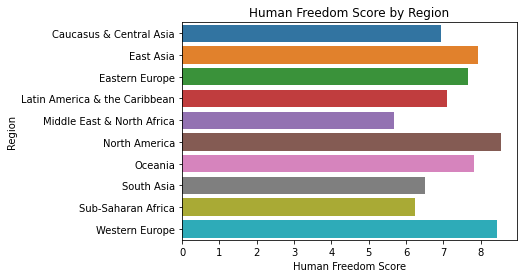

In [15]:
ax = sns.barplot(x=avg_hf, y=regions)
ax.set_title("Human Freedom Score by Region")
ax.set_xlabel("Human Freedom Score")
ax.set_ylabel("Region")

In [16]:
# look at USA

data_US = data.loc[data['countries'] == 'United States']
data_US.head()

,Unnamed: 0,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
1705,1705,2018,USA,United States,North America,8.44,17.0,1.0,7.7,6.2,...,8.0,9.9,9.1,9.6,8.0,8.4,8.8,8.22,6.0,10.0
1706,1706,2017,USA,United States,North America,8.55,8.0,1.0,7.7,6.4,...,8.2,9.8,9.0,9.6,8.0,8.5,9.0,8.34,5.0,10.0
1707,1707,2016,USA,United States,North America,8.52,14.0,1.0,7.6,6.7,...,8.0,9.8,9.2,9.6,8.0,8.5,9.0,8.32,5.0,10.0
1708,1708,2015,USA,United States,North America,8.54,13.0,1.0,7.6,6.7,...,7.6,9.8,9.6,9.6,8.0,8.3,8.9,8.27,6.0,10.0
1709,1709,2014,USA,United States,North America,8.51,15.0,1.0,8.1,6.5,...,8.0,9.8,9.8,9.6,8.0,8.3,8.8,8.16,8.0,10.0


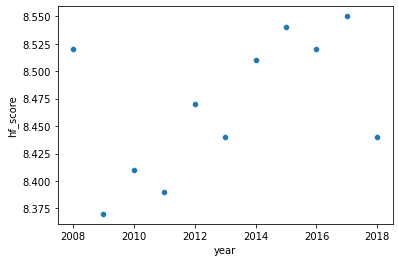

In [17]:
# US freedom score over time - scatterplot

ax = sns.scatterplot(x = 'year', y = 'hf_score', data=data_US)

In [ ]:
# line graph? sort of hard to follow scatterplot
ax = sns.lineplot(x='year',y='hf_score', data=data_